In [ ]:
#!pip install cityscapesscripts

https://www.cityscapes-dataset.com/downloads/

In [ ]:
# from cityscapesscripts.download import downloader

# ## providing credentials and looking at packages
# session = downloader.login()
# downloader.get_available_packages(session=session)

# ## Getting
# # 1. 'gtFine_trainvaltest.zip' (contains labels)
# # 2. 'leftImg8bit_trainvaltest.zip' (contains images)
# datalist = ['gtFine_trainvaltest.zip','leftImg8bit_trainvaltest.zip']

# downloader.download_packages(session = session,
#                              package_names = datalist,
#                              destination_path='/content/drive/MyDrive/Data/Self_driving/SemanticSeg/Cityscapes')

In [ ]:
## unzipping
#!unzip '/content/drive/MyDrive/Data/Self_driving/SemanticSeg/Cityscapes/gtFine_trainvaltest.zip' -d '/content/drive/MyDrive/Data/Self_driving/SemanticSeg/Cityscapes/'
#!unzip '/content/drive/MyDrive/Data/Self_driving/SemanticSeg/Cityscapes/leftImg8bit_trainvaltest.zip' -d '/content/drive/MyDrive/Data/Self_driving/SemanticSeg/Cityscapes/'


In [ ]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

In [ ]:
cityscape_train = datasets.Cityscapes(root= '/content/drive/MyDrive/Data/Self_driving/SemanticSeg/Cityscapes',
                                split = 'train',
                                mode = 'fine',
                                target_type = 'semantic')

cityscape_test = datasets.Cityscapes(root= '/content/drive/MyDrive/Data/Self_driving/SemanticSeg/Cityscapes',
                                split = 'test',
                                mode = 'fine',
                                target_type = 'semantic')

cityscape_val = datasets.Cityscapes(root='/content/drive/MyDrive/Data/Self_driving/SemanticSeg/Cityscapes',
                                split = 'val',
                                mode = 'fine',
                                target_type = 'semantic')
print(len(cityscape_train))
print(len(cityscape_test))
print(len(cityscape_val))

2975
1525
500


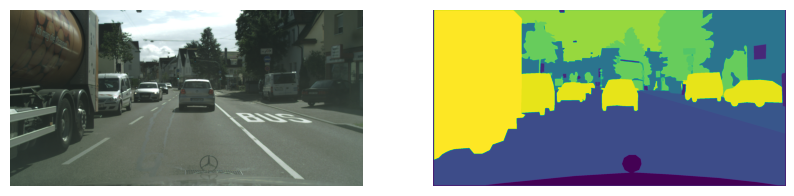

(1024, 2048, 3) (1024, 2048)
Unique mask values: [ 1  3  4  5  7  8 11 13 17 19 20 21 23 24 26 27]


In [ ]:
import numpy as np
fig = plt.figure(figsize = (10,5))
for i,(image,mask) in enumerate(cityscape_train):
  ax = fig.add_subplot(1,2,1)
  ax.imshow(image)
  plt.axis('off')
  ax = fig.add_subplot(1,2,2)
  ax.imshow(mask)
  plt.axis('off')
  plt.show()
  break
print(np.array(image).shape, np.array(mask).shape)
print(f'Unique mask values: {np.unique(mask)}')

In [ ]:
## Label information
from cityscapesscripts.helpers.labels import *
ids = [i.id for i in labels]
print(f'Numbers of classes orginally: {len(ids)}') # 0 to 33 and -1

Numbers of classes orginally: 35


## Custom labels and editing the masks

https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py

In [ ]:
## Custom labels using cat ID: https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py
cust_ids = [i.categoryId for i in labels]
print(f'new unique classes: {len(cust_ids)}')
coarse_labels = {}
for i in range(len(ids)):
  coarse_labels[ids[i]] = cust_ids[i]
coarse_labels

new unique classes: 35


{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 3,
 18: 3,
 19: 3,
 20: 3,
 21: 4,
 22: 4,
 23: 5,
 24: 6,
 25: 6,
 26: 7,
 27: 7,
 28: 7,
 29: 7,
 30: 7,
 31: 7,
 32: 7,
 33: 7,
 -1: 7}

In [ ]:
## Use this function to produce new mask during training
def change_mask(mask,coarse_labels):
  new_mask = np.zeros_like(mask)
  for i in sorted(coarse_labels):
    new_mask[mask == i] = coarse_labels[i]
  return new_mask

In [ ]:
# cityscape_train_coarse = []
# cityscape_test_coarse = []
# cityscape_val_coarse = []

# for i,(_,_) in enumerate(cityscape_train):
#   cityscape_train_coarse.append([np.array(cityscape_train[i][0]),np.array(cityscape_train[i][1])])
#   cityscape_train_coarse[i][1] = change_mask(cityscape_train_coarse[i][1],coarse_labels)
#   print(f'{i}/{len(cityscape_train)}')

# print(f'train done')

# for i,(_,_) in enumerate(cityscape_test):
#   cityscape_test_coarse.append([np.array(cityscape_test[i][0]),np.array(cityscape_test[i][1])])
#   cityscape_test_coarse[i][1] = change_mask(cityscape_test_coarse[i][1],coarse_labels)
#   print(f'{i}/{len(cityscape_test)}')

# for i,(_,_) in enumerate(cityscape_val):
#   cityscape_val_coarse.append([np.array(cityscape_val[i][0]),np.array(cityscape_val[i][1])])
#   cityscape_val_coarse[i][1] = change_mask(cityscape_val_coarse[i][1],coarse_labels)
#   print(f'{i}/{len(cityscape_val)}')

# print(f'val done')

